<a href="https://colab.research.google.com/github/PierreBernardCSMI/asciidoctor-mathematical/blob/master/Copie_de_01%3Dbases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implémentation et parcours de graphe

In [ ]:
%reset -f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('default')

In [ ]:
def one_arrow(ax,point1, point2):
    vec_x=point2.x-point1.x 
    vec_y=point2.y-point1.y
    #rem: c'est pas comme plt.plot: il faut donner le point de départ et le vecteur
    ax.arrow(point1.x,point1.y,vec_x,vec_y, head_width=0.05, head_length=0.1,length_includes_head=True)

## Implémentation d'un graphe

Voici le codage d'un graph où l'on utilise 3 classes. Les sommets (vertex) ont des positions. Les arrêtes (edge) ont des poids.  
  



### Classes

In [ ]:
class Vertex:

    def __init__(self,id:str,x:float,y:float):
        self.x=x
        self.y=y
        self.id=id
        self.come_in=[]  #edges entrant
        self.come_out=[] #edges sortant

        #on peu ajouter tous les attributs dont on a besoin (ex: un nom)

    def copy(self):
        return Vertex(self.id,self.x,self.y)

class Edge:

    def __init__(self,v1:Vertex,v2:Vertex):
        self.v1=v1
        self.v2=v2
        self.weight=0
        self.id=v1.id+","+v2.id #création automatique d'un id
        #on peu ajouter tous les attributs dont on a besoin

    def copy(self):
        res=Edge(self.v1,self.v2)
        res.weight=self.weight
        return res


class Graph:

    def __init__(self):
        self.vertices = {}
        self.edges={}

    def add_vertex(self, v: Vertex):
        self.vertices[v.id] = v

    def add_edge(self, id1, id2,weight=0):
        edge=Edge(self.vertices[id1],self.vertices[id2])
        edge.weight=weight
        self.edges[edge.id]=edge

In [ ]:
N = 10
graph = Graph()

for i in range(N):
    graph.add_vertex(Vertex(str(i), np.cos(i*2*np.pi/N), np.sin(i*2*np.pi/N)))

for i in range(N):
    for j in range(N):
        if np.random.rand()<0.3:
            graph.add_edge(str(i), str(j))

In [ ]:
def plot_graph(graph):
        fig,ax=plt.subplots()
        for id, vertex in graph.vertices.items():
            ax.plot(vertex.x, vertex.y, 'or')
        for id,edge in graph.edges.items():
            one_arrow(ax,edge.v1,edge.v2)
            #plt.plot([edge.v1.x, edge.v2.x], [edge.v1.y, edge.v2.y], 'k')

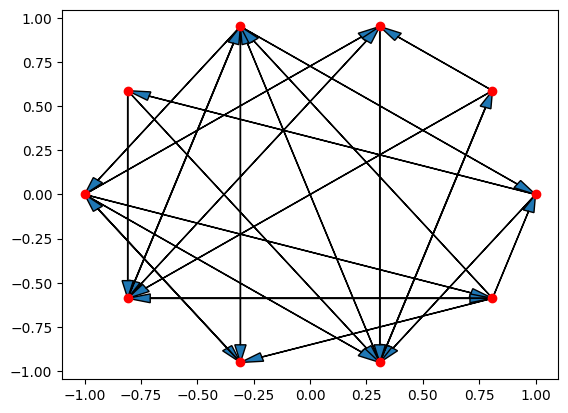

In [ ]:
plot_graph(graph)

***A vous:*** Qu'a-t-on oublié de code? Aide: il y a deux lignes de code inutile dans la définition des classes ci-dessus. 

***A vous:*** Qu'est-ce qu'on aurait du changer pour coder un graphe symétrique? 

### Autre technique

Il y a pleins d'autres manière de coder un graph.

* On pourrait se passer de la classe `Graph` qui chapote tout le monde. On pourrait le remplacer par une liste, ou bien par rien et un graph (connexe) serait alors repéré par n'importe lequel de ces vertex (un vertex 'racine'). 

* On pourrait se passer de la classe Edge comme ci-dessous: 

In [ ]:
class Vertex_minimaliste:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.to=[] #liste des vertices vers lequel on peut aller en partant de ce vertex

In [ ]:
N=15
graph=[]
for i in range(N):
    graph.append(Vertex_minimaliste(np.cos(i/N*2*np.pi),np.sin(i/N*2*np.pi)))

for i in range(len(graph)):
    for j in range(len(graph)):
            if (i*j)%3==0:
                 graph[i].to.append(graph[j])

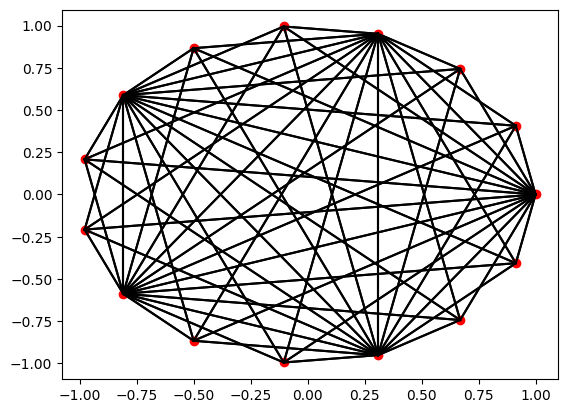

In [ ]:
for i, vertex in enumerate(graph):
    plt.plot(vertex.x, vertex.y, 'or')
    for j,voisin in enumerate(graph[i].to):
        plt.plot([vertex.x, voisin.x], [vertex.y, voisin.y], 'k')

### Digression sur les Identifiants. 



On pourrait aussi se passer de l'attribut `id` de type str. `self.vertices` aurait pu être une semble liste de vertex, et on aurait retrouver les vectex via leur position dans la liste. D'ailleurs si vous regarder bien mon code, on n'a pas beaucoup sécurisé l'attributions des `id`. 

***A vous:*** Qu'est-ce qu'il faudrait faire pour sécuriser ? 


Des `id`, à quoi ça sert ? 

* Notons déjà que tout objet à un `id` sous-jacent, une référence donnée par le langage, qui est stocké par les variable pointant vers l'objet. En python, c'est les références sont des hexadécimal, ex: `0x7f2fff0e87f0`
*  Mais, cet `id` par défaut est impossible à retenir, et il change d'un run à l'autre, d'une machine à l'autre. 

Avantage d'un `id` à nous, de type string (ou `int`): 
*  cela donne une méthode simple pour retrouver un objet; à condition d'avoir des dictionnaire qui stockent les paires (`id`,objet)
* Cela facile la copie
* Cela permet la sérialisation (c.à.d ...).  

Inconvénient: 
* cela gène le "refractoring" (l'entretient et la modification des "gros" codes). Quand je modifie un objet ou une variable, les IDE travaille dur pour que cela ne produise pas de bug. Le typage permet aussi de repérer très vite les problèmes. Un système d'`id` maison peut difficilement être compris par les IDE (encore que ...). 
* Par exemple, les anciens code de tensorflow_v1 abusaient des chaines de caractère pour référencer des variables. C'était assez désagréable de reprendre le code de quelqu'un. 






In [ ]:
class Homme:
    def __init__(self,nom,prenom):
        self.nom=nom
        self.prenom=prenom

In [ ]:
homme=Homme("toto","malin")
print(homme)

In [ ]:
homme2=homme
print(homme2)

Dans le même ordre d'idée: on peut parfois remplacer les objets par des dictionnaires (facile à sérailiser notamment). 
Mais encore une fois, c'est pas terrible pour le refractoring. Par exemple si l'on fait:  

In [ ]:
def cree_homme(prenom,nom):
   return {"nom":nom,"prenom":prenom}
hom =cree_homme("papi","moujo")

### 10000 lignes de code plus loin
hom["prenom"]="grand père"

et que l'on décide de passer à l'anglais: changer "nom" -> "second name" et "prenom" -> "first name" ...

### Deep copy

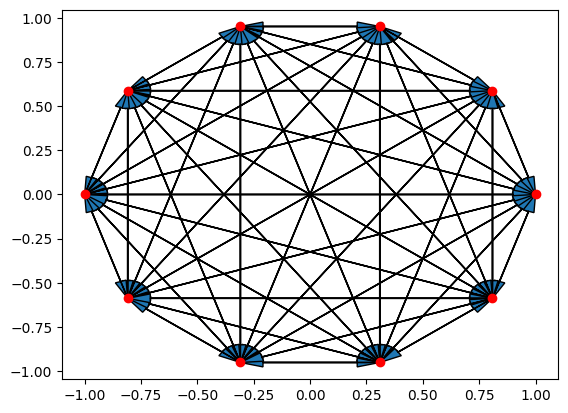

In [ ]:
N = 10
KN = Graph()

for i in range(N):
    KN.add_vertex(Vertex(str(i), np.cos(i*2*np.pi/N), np.sin(i*2*np.pi/N)))

for i in range(N):
    for j in range(N):
        KN.add_edge(str(i), str(j))

plot_graph(KN)

In [ ]:
def deep_copy_graph(graph):

    res=Graph()
    for id,vertex in graph.vertices.items():
        res.vertices[id]=vertex.copy()

    for id,edge in graph.edges.items():
        res.edges[id]=edge.copy()

    return res

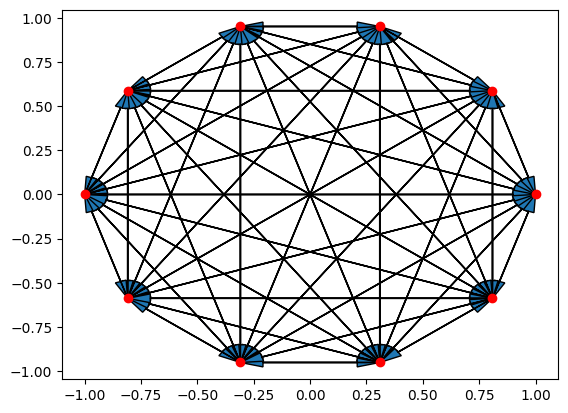

In [ ]:
KN2=deep_copy_graph(KN)
plot_graph(KN2)

La copie semble avoir fonctionner mais: 

In [ ]:
for id,vertex in KN.vertices.items():
    vertex.x=0

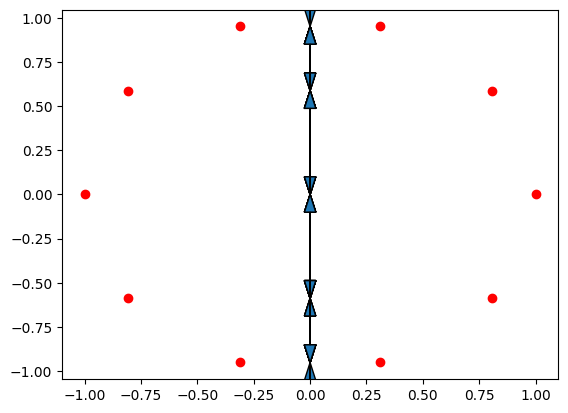

In [ ]:
plot_graph(KN2)

***A vous:*** Corrigez l'algo de copie profonde. 

## Un graphe pour une matrice

### Implémentation

On souhaite coder un graphe qui doit stocker une matrice. 

Plus de classe `Vertex` ou `Edge`. Cette simplicité est rendue possible car l'on suppose que les vertex sont numérotés de 0 à `N-1`.  Ils n'ont pas de nom, pas de position. 

Pour vertex `i` la liste `neighbours` donne les vertices vers lequel on peut aller, ainsi que des poids des edges correspondant.

Le poids des edges correspondent aux coefficients de la matrice que l'on veut coder. 

In [ ]:
class Graph:

    def __init__(self,N:int):
        """
        args: 
             N (int): the number of vertices
        """
        
        """Neighbours are a list of list"""
        self.neighbours=[]
        self.N=N
        for i in range(self.N):
            self.neighbours.append([])
               
    def addLink(self,i,j,weight):
        assert 0<=i<self.N
        assert 0<=j<self.N
        self.neighbours[i].append((j,weight))
               
    """ matrice d'adjacence"""    
    def getMatrix(self):        
        M=np.zeros([self.N,self.N])
        for i in range(self.N):
            for j,weight in self.neighbours[i]:
                M[i,j]=weight                                              
        return M

In [ ]:
"""testons"""
N=6
graph_leo=Graph(N)

graph_leo.addLink(0,1,0.5)
graph_leo.addLink(1,0,0.4)
graph_leo.addLink(1,2,0.3)
graph_leo.addLink(1,5,0.2)
graph_leo.addLink(2,1,0.1)
graph_leo.addLink(2,4,0.2)
graph_leo.addLink(4,3,0.3)

In [ ]:
graph_leo.neighbours[1]

[(0, 0.4), (2, 0.3), (5, 0.2)]

In [ ]:
print(graph_leo.getMatrix())

[[0.  0.5 0.  0.  0.  0. ]
 [0.4 0.  0.3 0.  0.  0.2]
 [0.  0.1 0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]


### représentation graphique

In [ ]:
def drawGraph(ax,graph:Graph,show_weight=True):
    
    points=np.empty([graph.N,2])
    
    for i,theta in enumerate(np.linspace(0,2*np.pi,graph.N,endpoint=False)):        
        points[i,:]=[np.cos(theta),np.sin(theta)]
        ax.annotate(
        str(i),
        xy=points[i,:], # positionnement
        xytext=(1, 1), #décallage de la boite texte
        textcoords='offset points', #sinon c'est nimp
        ha='left', va='bottom' #mise en page du texte
        )
        
    ax.plot(points[:,0],points[:,1],"o")
    ax.set_aspect("equal")
    ax.axis("off")
   
    for i in range(graph.N):
        for j,w in graph.neighbours[i]:
            if j != i:
                vec=points[j,:]-points[i,:]
                ax.arrow(points[i,0],points[i,1],vec[0],vec[1], head_width=0.05, head_length=0.1,length_includes_head=True)
                if show_weight:
                    ax.annotate(
                    str(w),
                    xy=points[i,:]+0.75*vec, # positionnement
                    xytext=(1, 1), #décallage de la boite texte
                    textcoords='offset points', #sinon c'est nimp
                    ha='left', va='bottom' #mise en page du texte
                    )

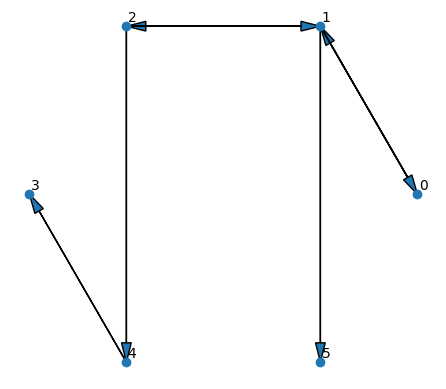

In [ ]:
fig,ax=plt.subplots()
drawGraph(ax,graph_leo,False)

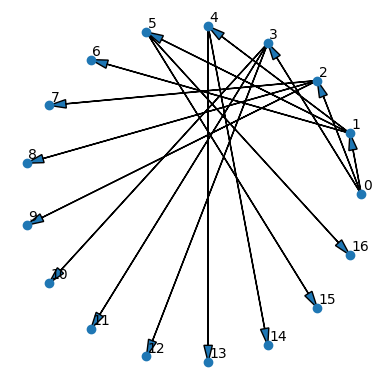

In [ ]:
graph_tree=Graph(17)

#--- Enfants

graph_tree.addLink(0,1,0.5)
graph_tree.addLink(0,2,0.5)
graph_tree.addLink(0,3,0.5)

#--- Petits enfants

graph_tree.addLink(1,4,0.5)
graph_tree.addLink(1,5,0.5)
graph_tree.addLink(1,6,0.5)

graph_tree.addLink(2,7,0.5)
graph_tree.addLink(2,8,0.5)
graph_tree.addLink(2,9,0.5)

graph_tree.addLink(3,10,0.5)
graph_tree.addLink(3,11,0.5)
graph_tree.addLink(3,12,0.5)

#---- Arrières petits enfants

graph_tree.addLink(4,13,0.5)
graph_tree.addLink(4,14,0.5)

graph_tree.addLink(5,15,0.5)
graph_tree.addLink(5,16,0.5)

fig,ax=plt.subplots()
drawGraph(ax,graph_tree,False)

### Amélioration

Imaginez le graph des sites internets du web. Chaque site est un vertex et les flèches sont les liens d'un site à l'autre. Monsieur Google est obligé de stocker ce graphe pour faire du page ranking. Il ont surrement un structure bien à eu. Et nous: 

Que devrions nous changer au programme précédent si on voulait un graphe immense pour lequelle on puisse 
* Facilement ajouter et supprimer des edges
* Facilement supprimer ou ajouter des vertex 





## Parcours de graphe

Parcourir un graph c'est faire la liste de tous ces sommets, en partant d'une "racine" et en suivant les arrêtes.  

 

### Profondeur  d'abord

La fonction récursives `depth_first()` propose un parcours du graphe qui consiste à foncer en profondeur avant de remonter quand on a "toucher le fond".  Mais regardez ci-dessous, elle bugue!  


***A vous:***
*  Expliquez le bug. En particulier, pour quel type de graphe cette méthode fonctionnerait? 
*  Corrigez la méthode pour qu'elle fonctionne dans tous les cas.  

In [ ]:
def depth_first(graph,start,callback):

    def depth_first_rec(current):    
        for j,w in graph.neighbours[current]:
            visited.append(j)
            callback(current,j)
            depth_first_rec(j)     

    visited=[start]
    depth_first_rec(start)

In [ ]:
def callback(i,j):
    print(i,"->",j,end="|")

In [ ]:
depth_first(graph_tree,0,callback)

0 -> 1|1 -> 4|4 -> 13|4 -> 14|1 -> 5|5 -> 15|5 -> 16|1 -> 6|0 -> 2|2 -> 7|2 -> 8|2 -> 9|0 -> 3|3 -> 10|3 -> 11|3 -> 12|

In [ ]:
try:
    depth_first(graph_leo,0,callback)
except Exception as e:
    print("\n",e)

0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1|1 -> 0|0 -> 1

### Largeur d'abord

Enfin un exo où vous allez tout faire vous même. Cherchez plutôt dans votre tête que sur internet. 

Implémenter une méthode `breadth_first()` qui explore le graphe progressivement: en explorant tous les vertex à distance 1 du vertex de départ, puis ceux à distance 2, etc. 

Vous pouvez essayer de partir de rien ou bien de ce canevas ci-dessous. Notez l'utilisation de la collection `deque`: c'est une structure de liste qui permet de retirer efficacement des éléments au début ou bien à la fin. 

Dans le programme ci-dessous on utilise `popleft()` pour retirer des éléments au début. La méthode `pop()`, qui existe aussi pour les listes ordinaire, permet de retirer un élément à la fin. 

Testez le programme avec `pop()`, cela change l'ordre de parcours, mais est-ce qu'on a pas quand même affaire à un parcours en profondeur d'abord ? 





    def breadth_first(graph,start,callback):

        def breadth_first_rec(current):    
            for j,w in graph.neighbours[current]:
                if j not in visited:
                    # todo ...
                    # todo ...
                    # todo ...
            
            if len(queue)>0:
                n = queue.popleft() #essayez aussi avec pop()   
                breadth_first_rec(n)

        visited=[start]
        import collections
        queue=collections.deque() #une fille t'attente
        breadth_first_rec(start)

In [ ]:
def breadth_first(graph,start,callback):

        def breadth_first_rec(current):    
            for j,w in graph.neighbours[current]:
                if j not in visited:
                    visited.append(j)
                    queue.append(j)
                    callback(current,j)
            
            if len(queue)>0:
                n = queue.popleft() #essayez aussi avec pop()   
                breadth_first_rec(n)

        visited=[start]
        import collections
        queue=collections.deque() #une fille t'attente
        breadth_first_rec(start)

La ligne de code :

    if j not in visited:

doit allumer un signal d'allarme chez tout bon programmeur. Lequel...

In [ ]:
breadth_first(graph_leo,0,callback)

0 -> 1|1 -> 2|1 -> 5|2 -> 4|4 -> 3|

Pour tester vos programmes: 

    breadth_first(graph_leo,0,callback)

renvoie

    0 -> 1|1 -> 2|1 -> 5|2 -> 4|4 -> 3|

et

    breadth_first(graph_tree,0,callback)

renvoie

    0 -> 1|0 -> 2|0 -> 3|1 -> 4|1 -> 5|1 -> 6|2 -> 7|2 -> 8|2 -> 9|3 -> 10|3 -> 11|3 -> 12|4 -> 13|4 -> 14|5 -> 15|5 -> 16|




### Application: 

* proposez une méthode pour mieux dessiner les graphes qui ont une structure d'arbre

* proposer une méthode pour permuter les indices d'une matrice creuse, de manière à ce que ces coefficients non nuls soient plus resserré autour de la diagonale (ce qui permet notamment de la stocker avec la structure ...) 



## Deep copy 2

Un objet en informatique, c'est un graphe. Les vertex étant les sous objet, et les références étant les  edges. 

Voici un exemple inspiré d'un projet sur lequel travail souvent les stagiaires CSMI. 



In [ ]:
class Maison:

    def __init__(self,nom):
        self.nom=nom
        self.maisons_voisines=[]
        self.pieces=[]

class Piece:
    def __init__(self,nom,maison):
        self.nom=nom
        self.maison=maison
        self.temperatures:np.ndarray #températures enregistrées au fil du temps
    
mon_logit=Maison("sweet_home")

piece1=Piece("salon",mon_logit)
piece1.temperatures=np.random.normal(size=10000)

piece2=Piece("sale de bain",mon_logit)
piece2.temperatures=np.random.normal(size=10000)

mon_logit.pieces=[piece1,piece2]

In [ ]:
mon_logit.pieces[0].temperatures

array([ 0.68989865, -0.07512903, -0.60045601, ...,  0.32712906,
        1.24771942,  0.74961414])

In [ ]:
import copy
mon_logit_copy=copy.deepcopy(mon_logit)
mon_logit_copy.pieces[0].temperatures[:]=0

In [ ]:
mon_logit.pieces[0].temperatures

array([ 0.68989865, -0.07512903, -0.60045601, ...,  0.32712906,
        1.24771942,  0.74961414])

On voit que `copy.deepcopy` a bien fait son travail. Cependant on a souvent besoin de copie personnalisée. Par exemple, ci-dessous, on pourrait vouloir que les séries temporelles de températures ne soient pas copiée (car, imaginons, ce sont d'énormes séries temporelles). 

***A vous:*** 

* Dessinez le graphe correspondant à mon_logit. Y-a-il des boucles de référence dans ce graph?

* Créer une seconde maison et faites en sorte qu'elles soient voisines. Actualisez votre dessin. Réfléchissez à ce que fait `copy.deep_copy` quand on lui demande de copier une des deux maisons. Et si on lui demande: 

        mon_logit_copy=copy.deepcopy(mon_logit)
        maison_voisin_copy=copy.deepcop(maison_voisin)

    Ces deux maisons restent-t-elles voisines? 



* Imaginez l'algo de copie de la structure de donnée précédente, mais un algo qui ne copie jamais les sériez temporelles `temperatures`. C'est un peu long à implémenter, ne le faites pas. 

## NetworkX

Jetez un coup d'oeil à la [gallery](https://networkx.github.io/documentation/stable/auto_examples/index.html)

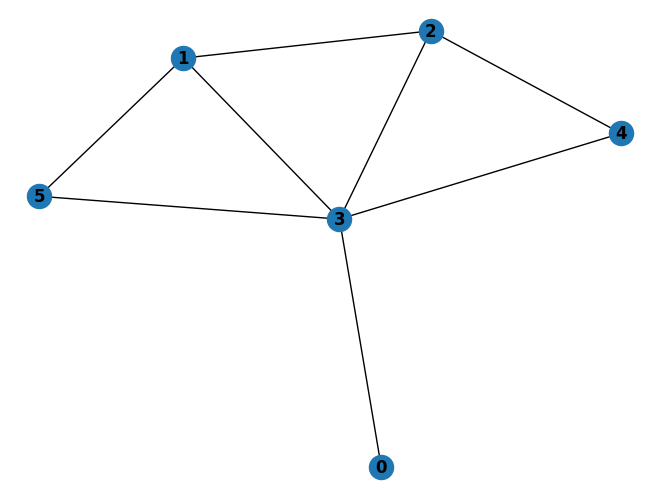

In [ ]:
import networkx as nx
 
# Create a networkx graph object
my_graph = nx.Graph() 
 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])
 
# Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')